<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Computer_Vision_and_Image_Processing/blob/main/CSE428_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

Max collaborators = 3

There is a bit of handholding. If you still do not understand something, feel free to reach out to your lab faculties. Good luck.

In [8]:
COLLABORATORS_NAME = "Ahtesham Ibne Mostafa"
COLLABORATORS_ID = "24241309"

# Part 1 [15 Marks]

In this part, you will work with point processing, HE, AHE, and CLAHE.

In [9]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
### If you need other dependencies import here -
from skimage import img_as_float
### Code ends

In [10]:
### If you need helper functions defined, define here -

### Code ends

## Task 1 - Basic Image Operation

Import any photograph taken by you (RGB) (`sample_1.jpeg`/`sample_1.jpg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

Remember - your image name MUST be `sample_1.jpeg`/`sample_1.jpg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [37]:
I = io.imread("/content/ChatGPT Image Aug 5, 2025, 02_44_12 PM.png") # Replace None with appropriate import function call

# Normalize the image so that the pixel values of each channel are between 0 and 1
I = img_as_float(I)


# find the height and the width of the image
H = I.shape[0]  # should contain height
W = I.shape[1]  # should contain width
print("Height is", H)
print("Width is", W)

Height is 1024
Width is 1024


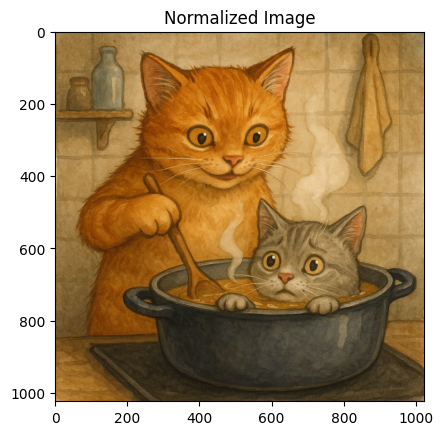

In [12]:
I = img_as_float(I) # Replace none and normalize the image so that the pixel values of each channel are between 0 and 1

### Write a code to display the image -
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.title("Normalized Image")
plt.show()
### Code ends

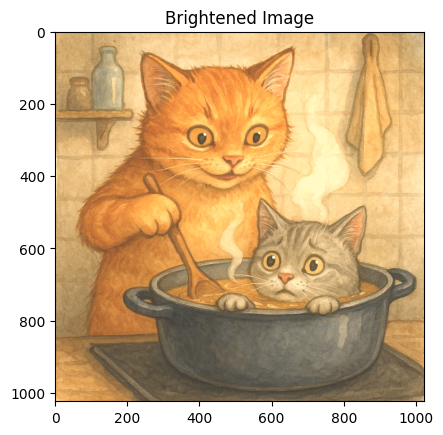

In [13]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright.
I_bright = None

### Hint - You have to convert to LAB first

### Write a code to display the I_bright -
I_lab = color.rgb2lab(I)

L = I_lab[:, :, 0]
A = I_lab[:, :, 1]
B = I_lab[:, :, 2]

L_bright = np.clip(L + 20, 0, 100)

I_lab_bright = np.stack((L_bright, A, B), axis=2)

I_bright = color.lab2rgb(I_lab_bright)

plt.imshow(I_bright, cmap='gray', vmin=0, vmax=1)
plt.title("Brightened Image")
plt.show()

### Code ends

/tmp/ipython-input-1017011360.py:11: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 356 negative Z values that have been clipped to zero
  I_dark = color.lab2rgb(I_lab_dark)


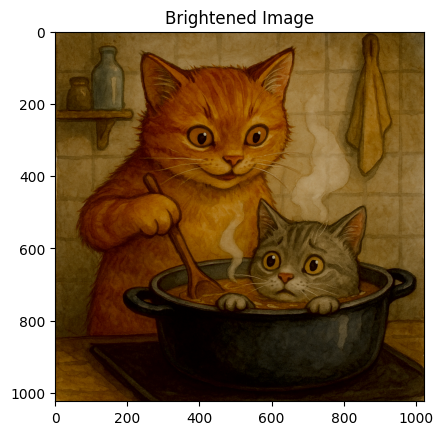

In [14]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark.
I_dark = None

### Write a code to display the I_bright -

L_dark = np.clip(L -20, 0, 100)

I_lab_dark = np.stack((L_dark, A, B), axis=2)

I_dark = color.lab2rgb(I_lab_dark)

plt.imshow(I_dark, cmap='gray', vmin=0, vmax=1)
plt.title("Brightened Image")
plt.show()

### Code ends

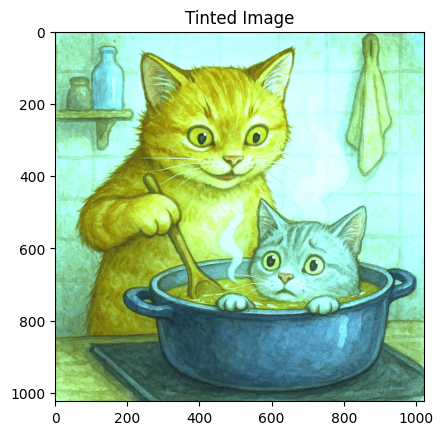

In [15]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### Write a code to display the I_tint -

I_tint[:, :, 0] = I[:, :, 0] * 1   # R
I_tint[:, :, 1] = I[:, :, 1] * 2   # G
I_tint[:, :, 2] = I[:, :, 2] * 3   # B


I_tint = np.clip(I_tint, 0, 1)

plt.imshow(I_tint, cmap='gray', vmin=0, vmax=1)
plt.title("Tinted Image")
plt.show()
### Code ends

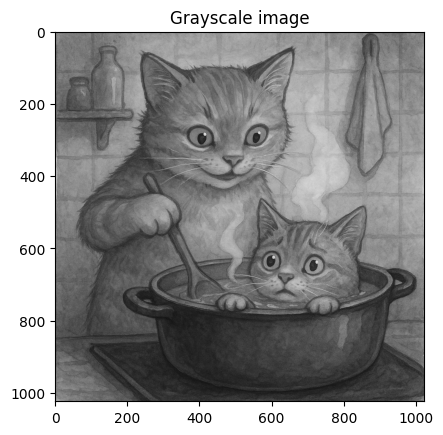

In [16]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)

### Write a code to display the I_gray -
plt.imshow(I_gray, cmap='gray', vmin=0, vmax=1)
plt.title("Grayscale image")
plt.show()
### Code ends

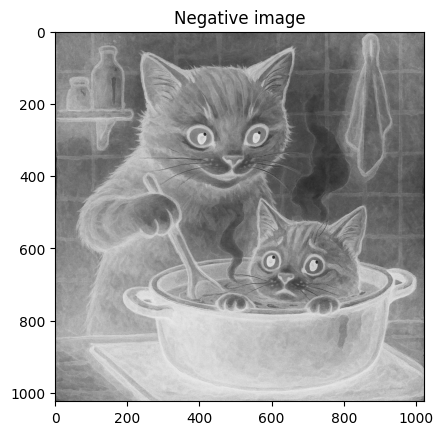

In [17]:
# Display the negative of the grayscale image
I_neg = 1- I_gray

### Write a code to display the I_neg -
plt.imshow(I_neg, cmap='gray', vmin=0, vmax=1)
plt.title("Negative image")
plt.show()
### Code ends

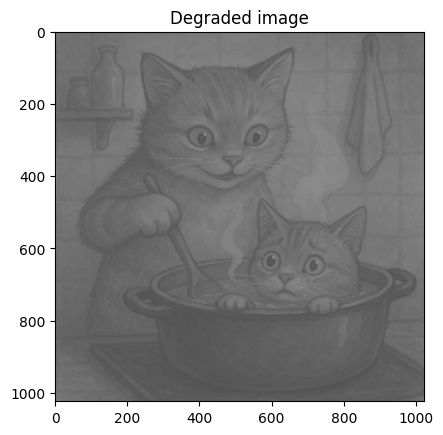

In [18]:
# This cell will artificially degrade your grayscale image by reducing contrast
# The max pixel value is mapped to 0.6 and the min pixel value is mapped to 0.3
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))

# Try to understand what is going on
# You will need to use this concept later on

### Write a code to display the I_degraded -
plt.imshow(I_degraded, cmap='gray', vmin=0, vmax=1)
plt.title("Degraded image")
plt.show()
### Code ends

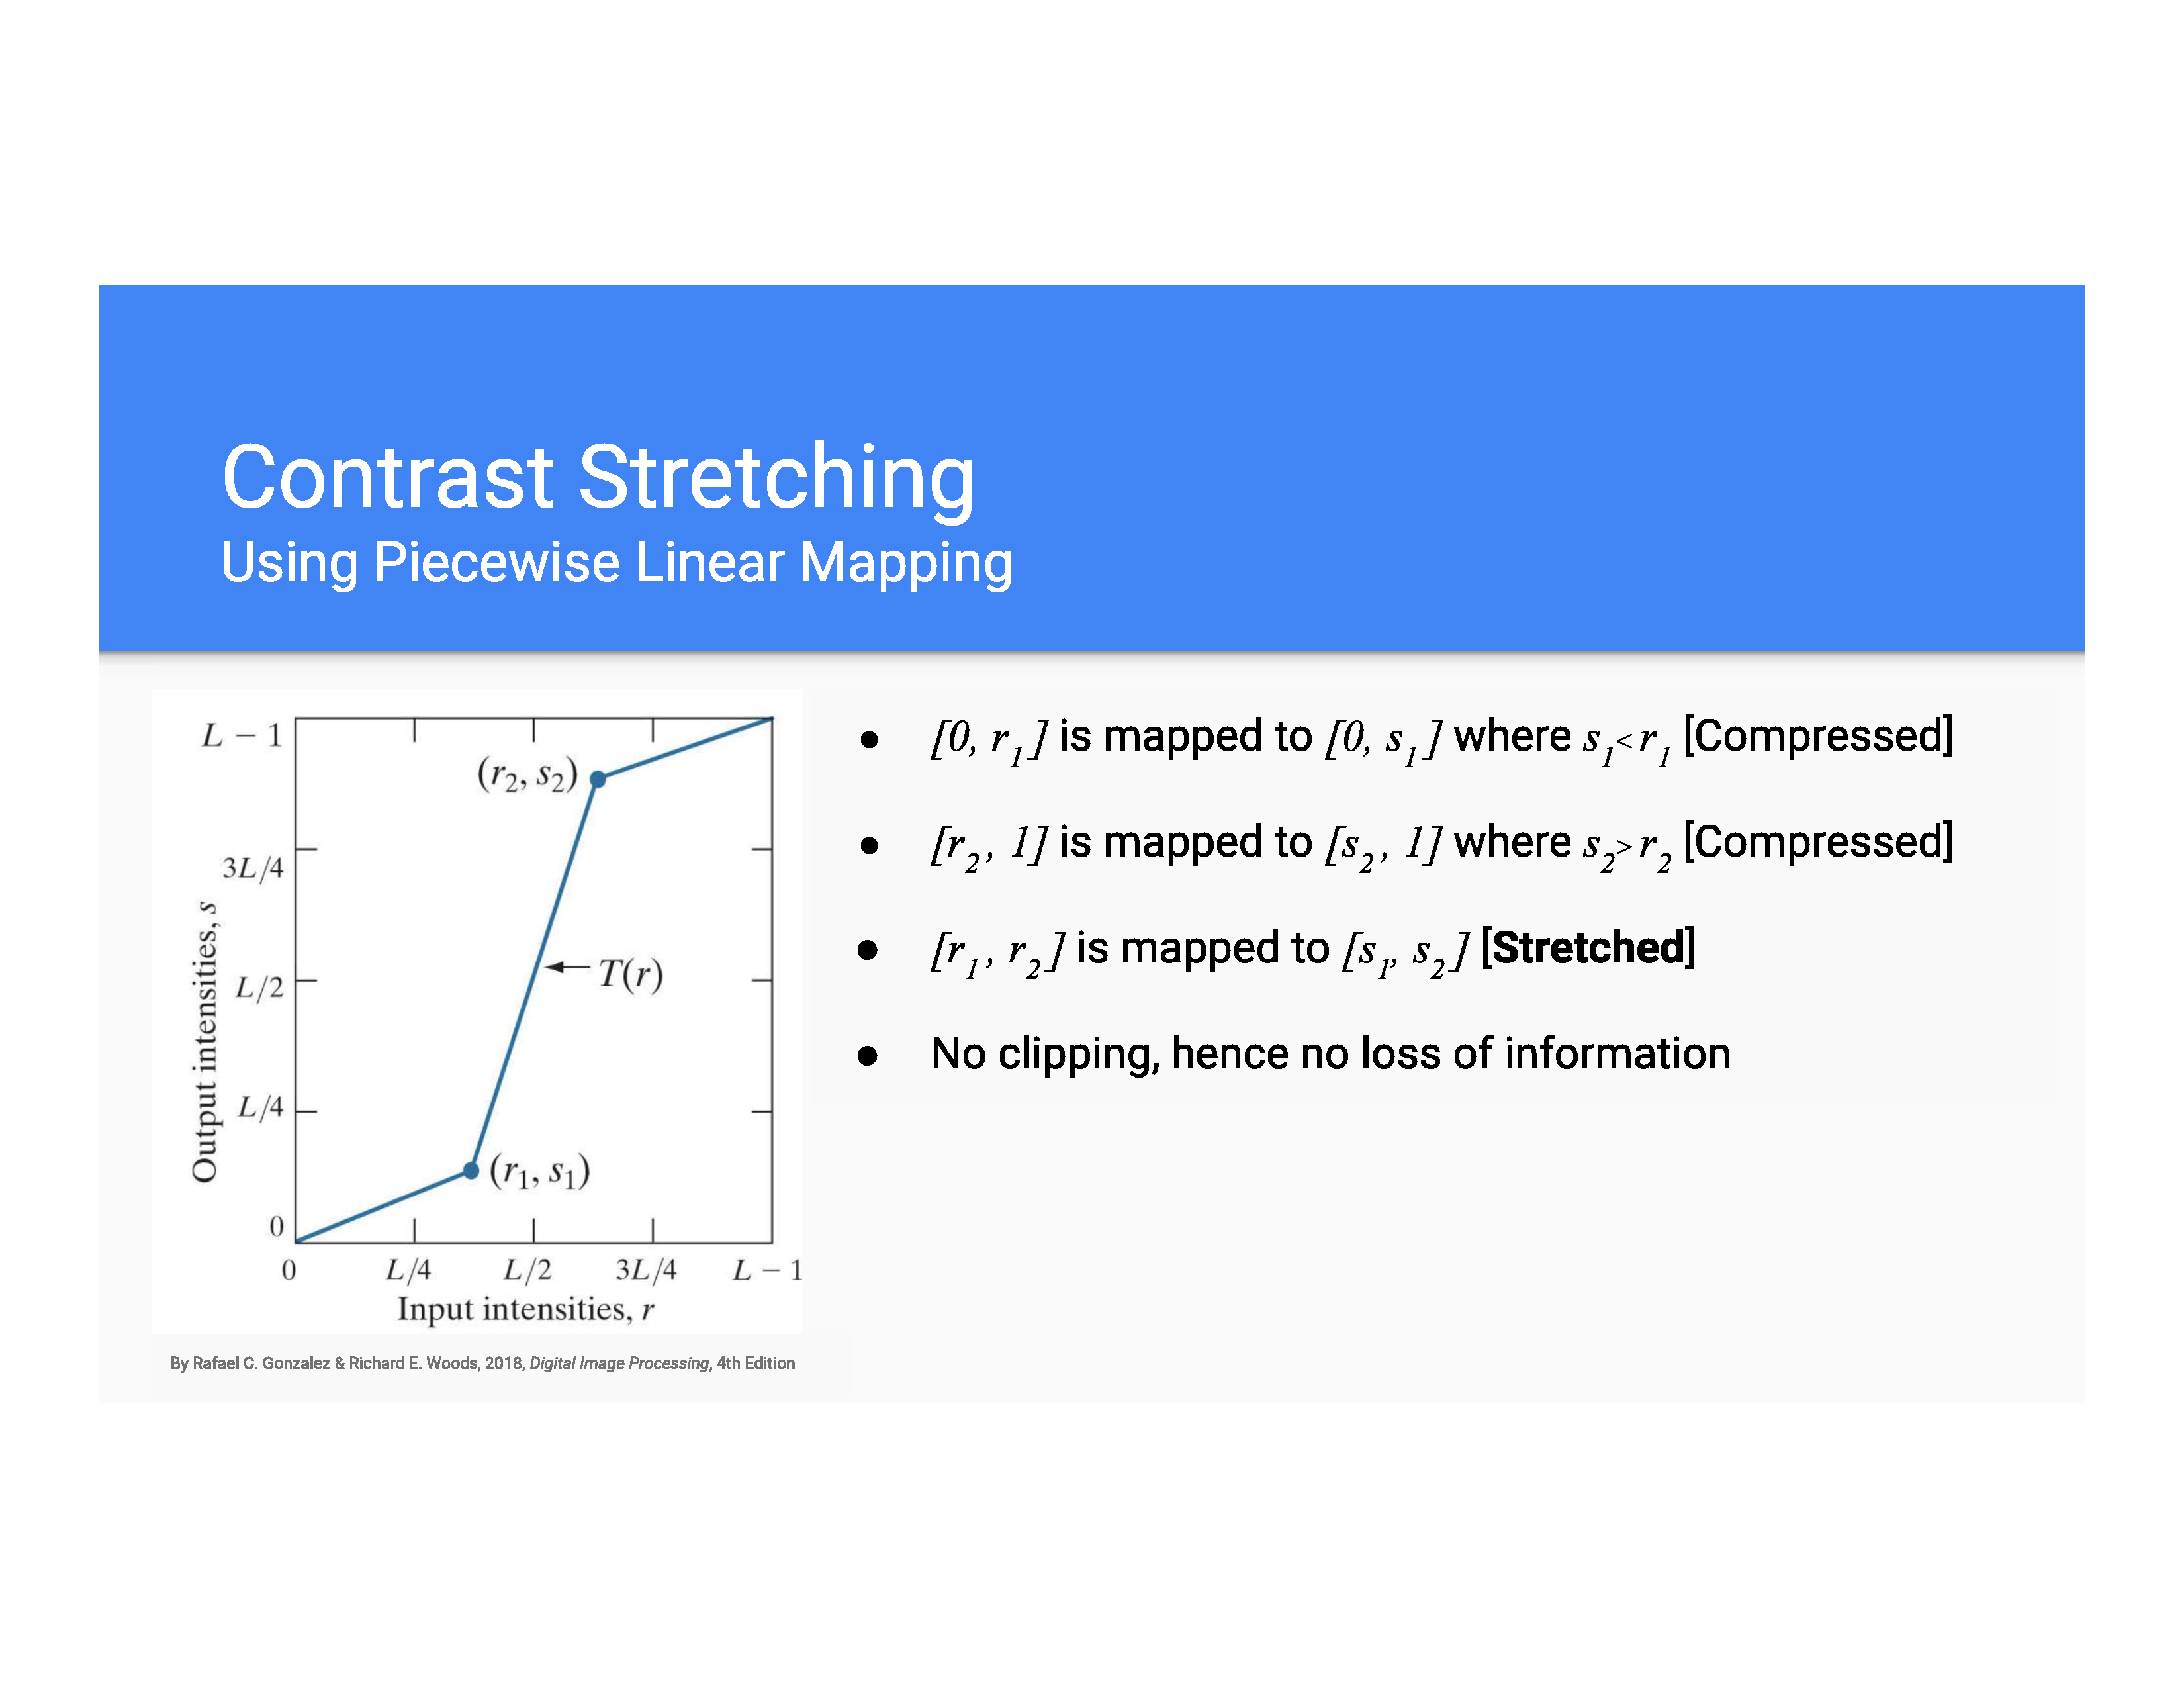

In [19]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in the picture above

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    I_stretched = np.zeros_like(I) # replace with appropriate code
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            r = I[i, j]
            if r <= r1:
                I_stretched[i, j] = (s1 / r1) * r
            elif r <= r2:
                I_stretched[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                I_stretched[i, j] = ((1 - s2) / (1 - r2)) * (r - r2) + s2

    return I_stretched

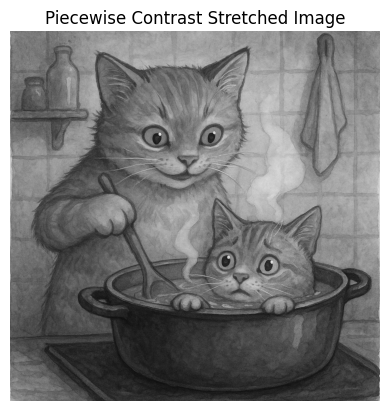

In [20]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.7
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

### Write a code to display the I_stretched -
plt.imshow(I_stretched, cmap='gray')
plt.title("Piecewise Contrast Stretched Image")
plt.axis('off')
plt.show()
### Code ends

## Task 2 - Histogram and Equalization

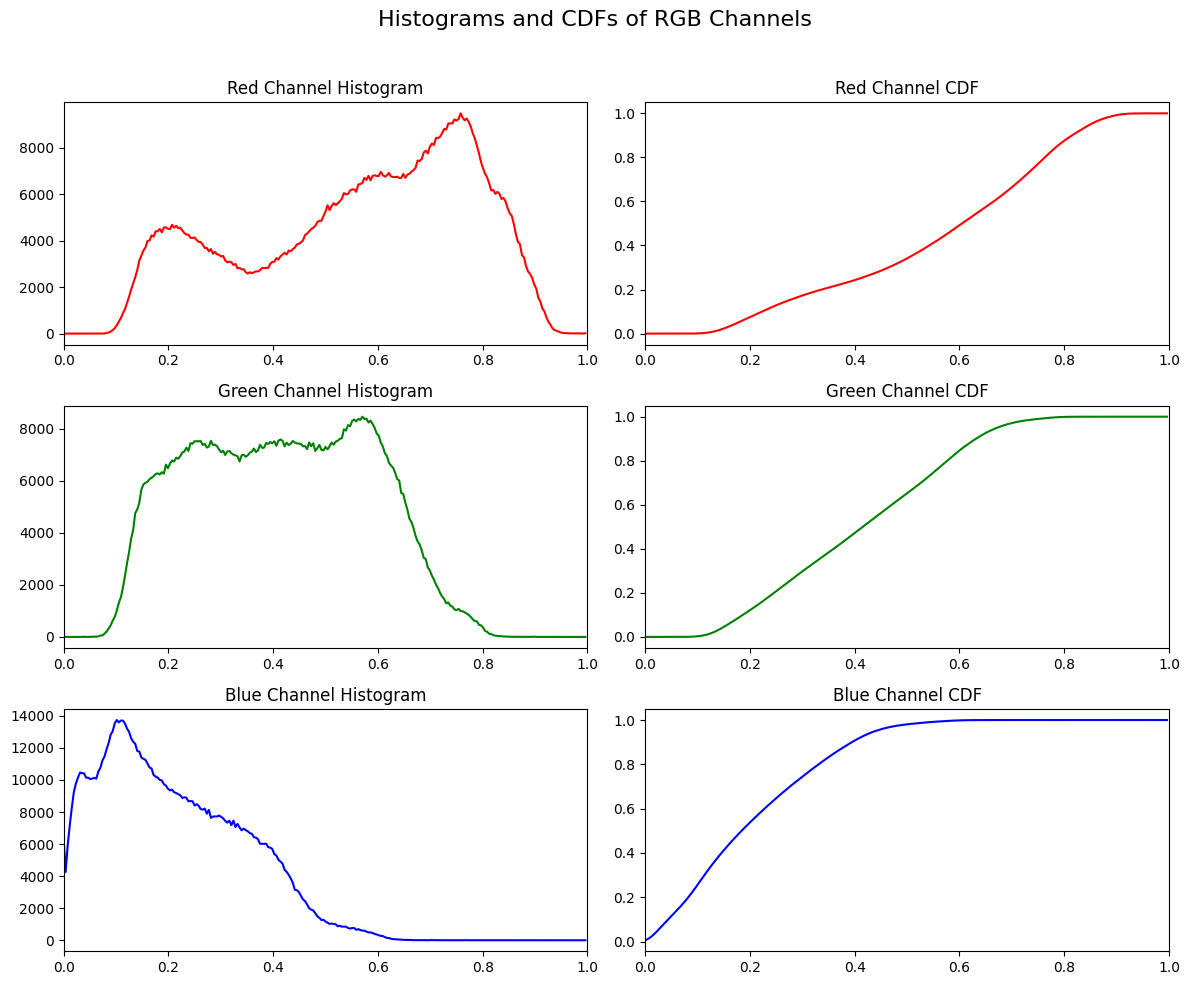

In [38]:
# Plot the image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### Begin solution
colors = ['Red', 'Green', 'Blue']
channel_indices = [0, 1, 2]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Histograms and CDFs of RGB Channels", fontsize=16)

for i, color in zip(channel_indices, colors):
    channel_data = I[:, :, i].flatten()

    hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
    axes[i, 0].plot(bins[:-1], hist, color=color.lower())
    axes[i, 0].set_title(f"{color} Channel Histogram")
    axes[i, 0].set_xlim(0, 1)

    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    axes[i, 1].plot(bins[:-1], cdf, color=color.lower())
    axes[i, 1].set_title(f"{color} Channel CDF")
    axes[i, 1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
### End solution

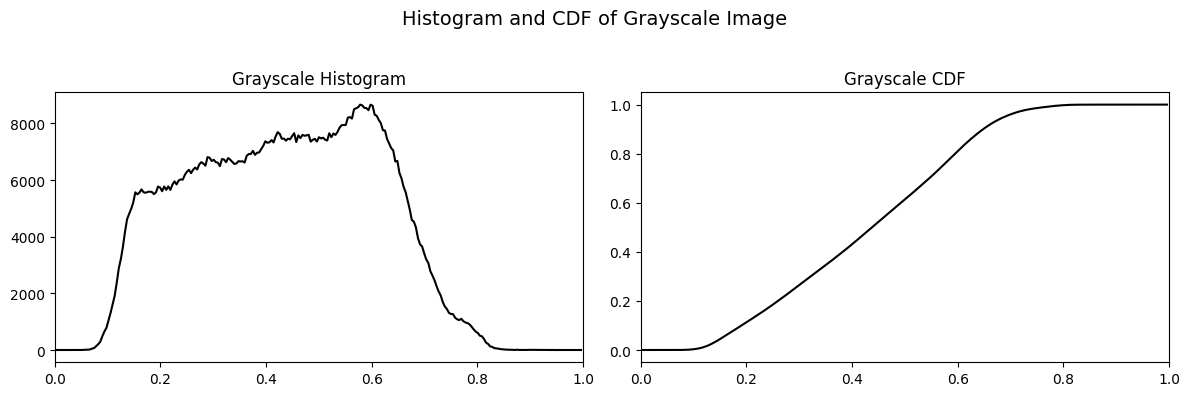

In [42]:
# Plot the grayscale image, I_gray, and its histogram + cdf

### Begin solution

channel_data = I_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("Grayscale Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("Grayscale CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### End solution

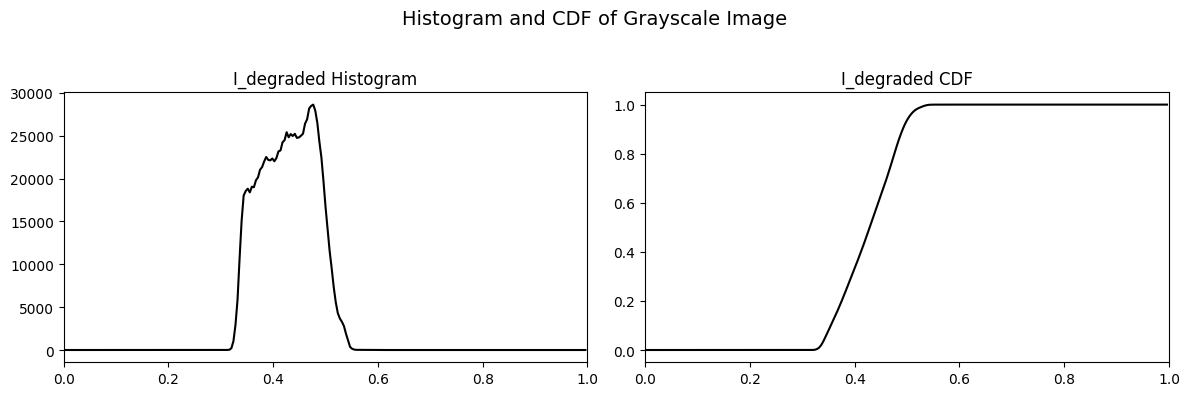

In [43]:
# Plot the degraded image, I_degraded, and its histogram + cdf

### Begin solution
channel_data = I_degraded.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_degraded Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_degraded CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### End solution

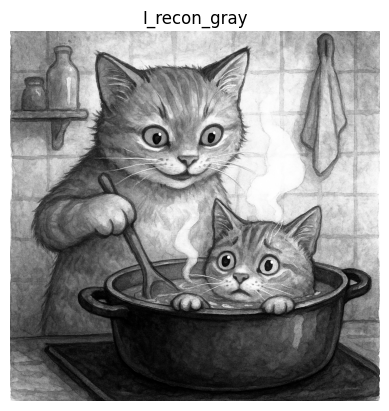

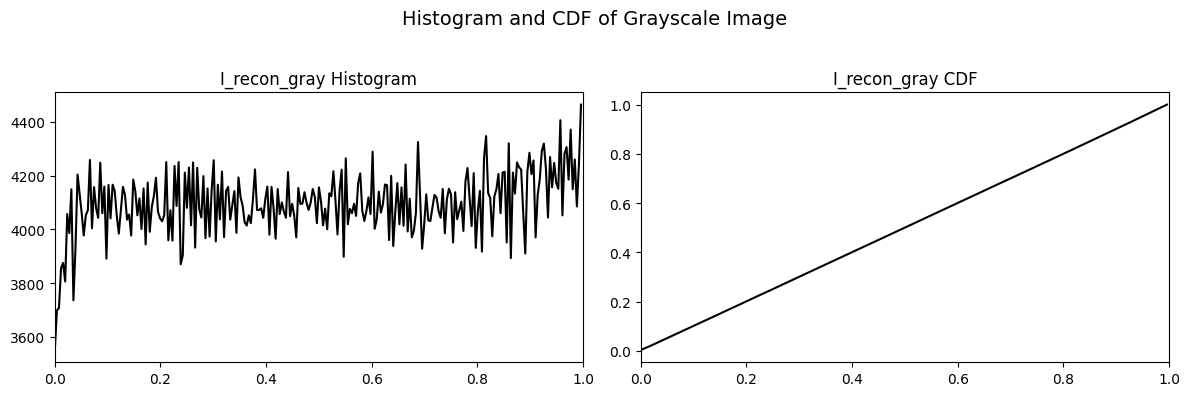

In [55]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray

I_recon_gray = exposure.equalize_hist(I_degraded)

### Write a code to display the I_recon_gray along with its histogram + CDF -
plt.imshow(I_recon_gray, cmap = 'grey')
plt.title("I_recon_gray")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

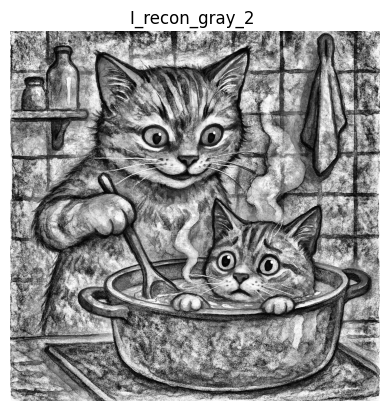

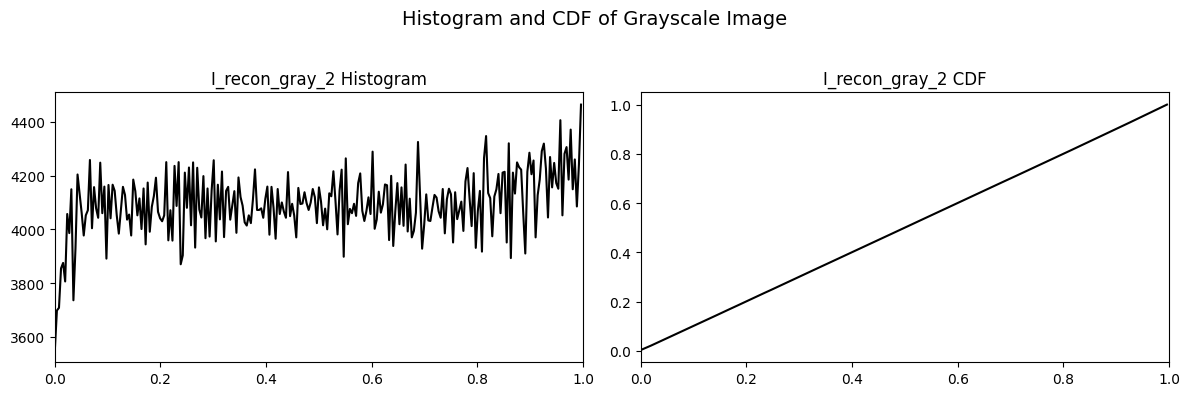

In [56]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(64,64), clip_limit=0)

### Write a code to display the I_recon_gray_2 along with its histogram + CDF -
plt.imshow(I_recon_gray_2, cmap = 'grey')
plt.title("I_recon_gray_2 ")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray_2, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray_2 Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray_2 CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

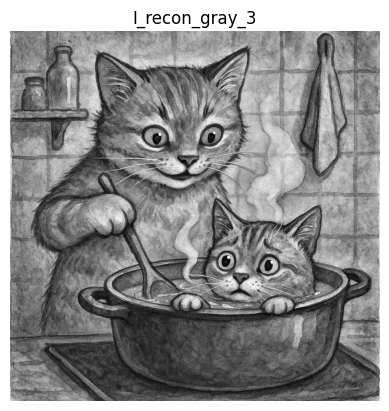

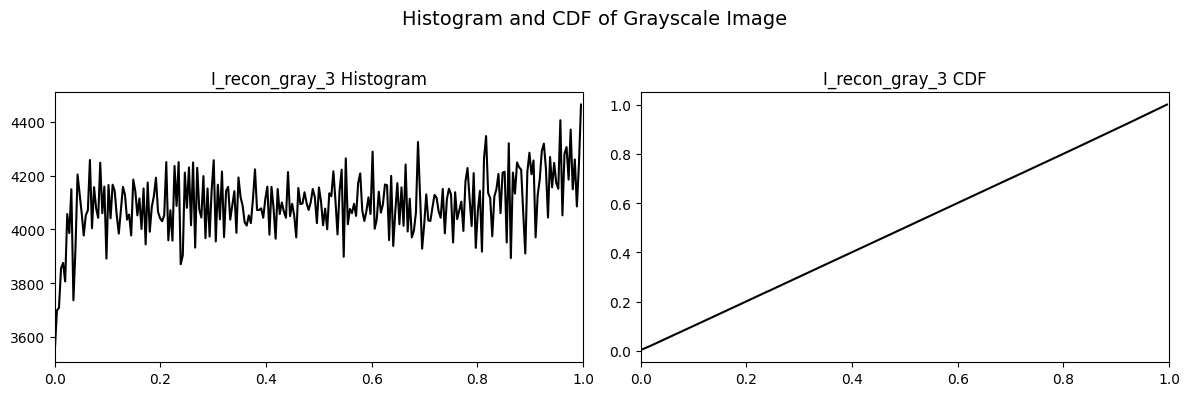

In [57]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_3
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(64,64), clip_limit=0.01)

### Write a code to display the I_recon_gray_3 along with its histogram + CDF -
plt.imshow(I_recon_gray_3, cmap = 'grey')
plt.title("I_recon_gray_3")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray_3, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray_3 Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray_3 CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

In [27]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it

I_rgb_degraded = None

### Write a code to display the I_rgb_degraded along with its RGB histogram -

### Code ends

In [28]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
I_recon_color = None

### Write a code to display the I_recon_color along with its RGB histogram -

### Code ends

## Task 3 - Recovering QR code

You have been provided a badly damaged QR code - https://drive.google.com/file/d/1OcGWGwdL7wrhkwJMabtO7C9FXochD7t5/view?usp=drive_link

Your task is to recover it. Apply global histogram equalization, AHE and CLAHE on the image and see if you can read any version of the image.

❗For AHE and CLAHE, do not use a kernel size greater than 64.❗

In [29]:
# Download the image from the drive link above
# Upload it to your current working directory in colab
# Load the image and save it under I variable
I = None

# Convert to LAB
I_lab = None

# Apply the processing methods -
I_histeq = None
I_ahe = None
I_clahe = None

### Display the processed images on a 1x3 subplot

### Code ends

**Q1. Enter the link embedded in the QR code (if needed do a separate plot of each processed image) -**

*Answer -* \*Enter your answer here\*

**Q2. Which method(s) worked for you?**

*Answer -* \*Enter your answer here\*

**Q3. Why do you think the method(s) worked? Or why did the other method(s) fail to work?**

*Answer -* \*Enter your answer here\*

# Part 2 [15 Marks]

In this part of the assignment, you will work with filters.

In [30]:
import time
from scipy import signal
### If you need other dependencies import here -

### Code ends

In [31]:
### If you need helper functions defined, define here -

### Code ends

## Task 1 - Direct vs FFT method correlation

Import another photograph taken by you (RGB) (`sample_2.jpeg`/`sample_2.jpg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

Remember -  your image name MUST be `sample_2.jpeg`/`sample_2.jpg`.

Make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

In [32]:
# Load the image
I = None

### Write a code to display the image -

### Code ends

In [33]:
# Define a gaussian kernel of size (35, 35)
kernel = None

### Write a code to display the kernel -

### Code ends

Now, apply `signal.correlate()` function to apply the kernel. Use `mode='same'` to preserve image dimensions. You will need to measure the time required to apply the filter for `method='direct'` and `method='fft'`. The next cell shows how to measure execution time -

In [34]:
start_time = time.clock()

# Some function -
a = 1
b = 3
c = a + b
# Function ends

print("Time elapsed: ", time.clock() - start_time, "seconds")

AttributeError: module 'time' has no attribute 'clock'

In [ ]:
# Apply your kernel on your image using method='direct'
# Measure the execution time

### Time measurement wrapper starts
filetred_image_direct = None
### Time measurement wrapper ends

In [ ]:
# Apply your kernel on your image using method='fft'
# Measure the execution time

### Time measurement wrapper starts
filetred_image_fft = None
### Time measurement wrapper ends

**Q1. Which method was faster?**

*Answer -* \*Write your answer here\*

**Q2. Provide reasoning -**

*Reasoning -* \*Write your answer here\*

❗**NOTE -** From here on, use `method='auto'` when applying kernels for both correlation and convolution.❗

## Task 2 - Correlation vs Convolution

For convolution, use `signal.convolve()`. Maintain image dimensions for filtering.

In [ ]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = None

### Write a code to display the kernel -

### Code ends

In [ ]:
# Define any asymmetric kernel of size (105, 105)
kernel_asymmetric = None

### Write a code to display the kernel -

### Code ends

In [ ]:
# Filter the image with the symmetric kernel

# Filter using correlation
filtered_image_symmetric_corr = None

# Filter using convolution
filtered_image_symmetric_conv = None

### Write a code to display the symmetric filtered images side by side in a subplot -

### Code ends

In [ ]:
# Filter the image with the asymmetric kernel

# Filter using correlation
filtered_image_asymmetric_corr = None

# Filter using convolution
filtered_image_asymmetric_conv = None

### Write a code to display the asymmetric filtered images side by side in a subplot -

### Code ends

**Q1. Are the outputs for correlation and convolution same?**

*Answer -* \*Write your answer here\*

**Q2. Provide reasoning -**

*Answer -* \*Write your answer here\*

## Task 3 - Finding edges

Load this image - https://drive.google.com/file/d/1i8nJke1OJ7DMj8yzi91Sm6TiuGEwRl0R/view?usp=sharing

In [ ]:
# Download the image from the drive link above
# Upload it to your current working directory in colab
# Load the image and save it under I variable
I = None

### Write a code to display the image -

### Code ends

The diamond in the image has two parallel sides. You will need to come up with two $3\times3$ kernels to detect the two sets of parallel sides. Your filters should not detect all the four sides at once.

In [ ]:
# Define the 2 custom kernels by replacing the "?"s with your values
# After finding out the values, uncomment the next few lines of code in this cell

# kernel_1 = np.array([[?, ?, ?],
#                      [?, ?, ?],
#                      [?, ?, ?]])

# kernel_2 = np.array([[?, ?, ?],
#                      [?, ?, ?],
#                      [?, ?, ?]])

In [ ]:
# Apply kernel_1 on I and save it as first_pair
first_pair = None

# Apply kernel_2 on I and save it as second_pair
second_pair = None

### Write a code to display the two filtered images side by side in a subplot

### Code ends

**Q1. Which filters did you use and why?**

*Answer -* \*Enter your answer here\*

**Q2. How do your coefficients help in detecting the edges?**

*Answer -* \*Enter your answer here\*

**Q3. Are your kernels unique or there can be other kernels which can accomplish the same task?**

*Answer -* \*Enter your answer here\*